# Respostas para o primeiro questionário de SME5924

In [26]:
from numpy import *   #importante para usar a função math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

personal_path = "/home/llober/Documentos/0.doutorado/6.Aulas-e-cursos/processos-dinamicos/dados/"   #define o caminho local do arquivo da rede

## Q1

Faz a importação da rede que iremos usar.

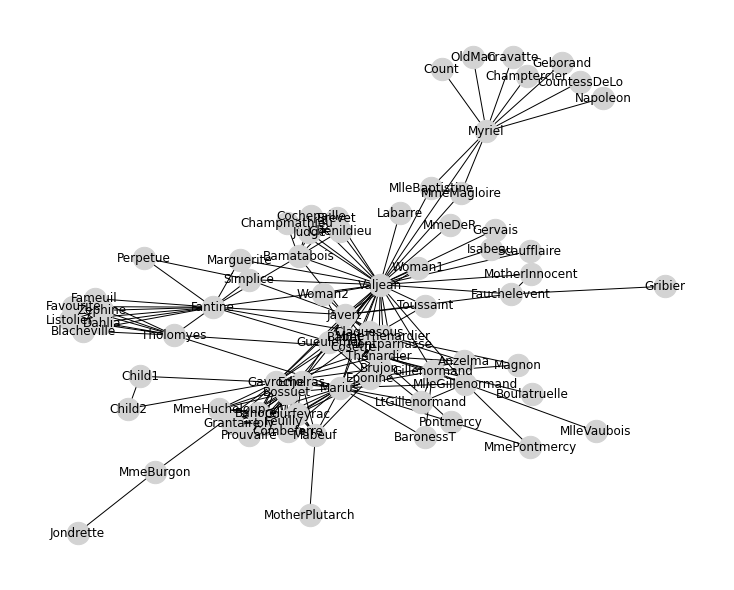

In [5]:
#Importa e mostra a rede dos personagens do livro "Os miseráveis"
G_mis = nx.read_gml(str(personal_path + "lesmis.gml")) 
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_mis)   #essa função permite espaçar os vértices de forma a melhor visualizar a rede
nx.draw(G_mis, pos, node_color="lightgray", node_size=500, with_labels=True)

Abaixo, define a função que calculará um momento de grau `n` para uma rede qualquer `G`.

O n-ésimo momento de uma rede é dado por $$\frac{1}{N} \sum^N k_i^n$$

onde $k_i$ é o grau do vértice i $\in$ G, que possui $N$ vértices no total.

In [36]:
def momento(G,n):
    M = 0       #inicializa a variável que conterá sum(G.degree(i)^m) como zero 
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**n
    M = M/N
    return M

Para o terceiro e quarto momento da rede acima, basta somente aplicar `momento(G,3)` e `momento(G,4)`.

In [42]:
#Terceiro momento
print('Terceiro momento de k:', "%3.0f"%momento(G_mis,3))   #arredonda para o inteiro mais próximo

#Quarto momento
print('Quarto momento de k:', "%3.0f"%momento(G_mis,4))

Terceiro momento de k: 1408
Quarto momento de k: 33593


## Q2.

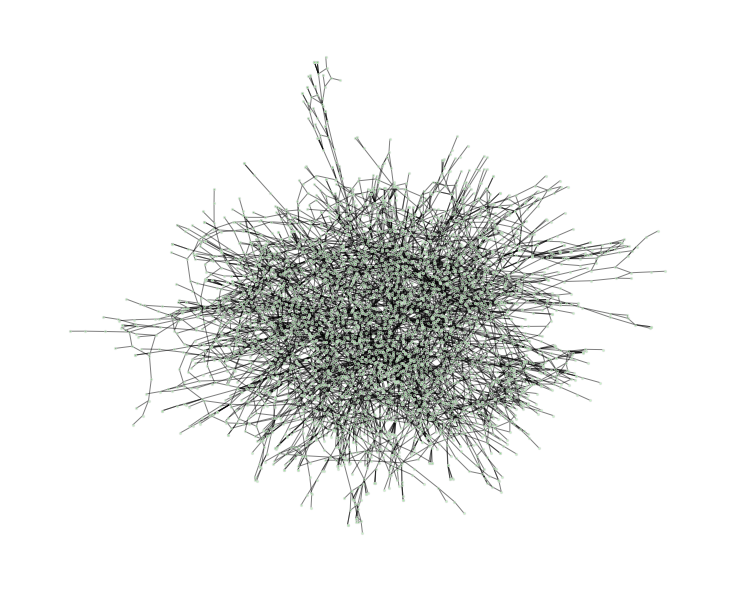

In [14]:
#Importa e mostra a rede de energia elétrica dos EUA
G_power = nx.read_weighted_edgelist(str(personal_path + "powergrid.txt"))
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_power)
nx.draw(G_power, with_labels = False, node_size=5, node_color = "lightgreen", 
          edgecolors = "lightgray", alpha=0.5, font_size=16, pos = pos)   #a rede é mais densa, então mudo o tamanho e transparência dos vértices e arestas

Esse tipo de rede (de transmissão de energia em geral) precisa ser mais denso de forma a transmitir a energia de forma eficiente para uma dada região.

A complexidade de uma rede é definida por

$$\alpha = \frac{<k^2>}{<k>}$$

que nada mais é do que o segundo momento dividido pela grau médio da rede. A função abaixo permite extrair essa segunda propriedade.

In [37]:
def complexidade(G):
  k = dict(G.degree()).values()
  k = np.array(list(k))   #O dicionário acima contém entradas e valores. Aqui, extraímos os valores
                          #essa mesma estrutura será também utilizada para calcular a distribuição de grau
  mk = mean(k)   #calcula o grau médio
  alpha = momento(G,2)/mk
  return alpha

In [38]:
alpha_power = complexidade(G_power)
print("Complexidade para a rede de energia elétrica dos EUA = ", "%3.2f"%alpha_power)   #mostra o valor arredondado para 2 casas decimais

Complexidade para a rede de energia elétrica dos EUA =  3.87


##Q3.

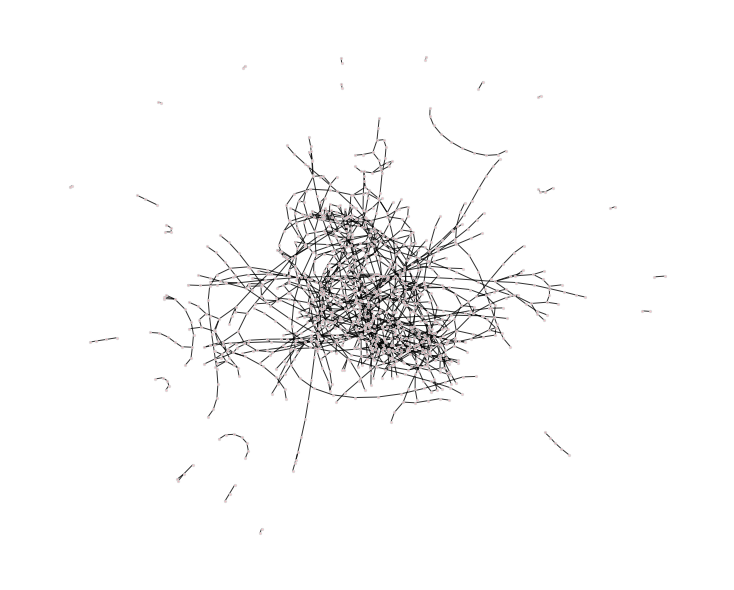

In [17]:
#Importa e mostra a rede de estradas européias
G_euro = nx.read_weighted_edgelist(str(personal_path + "euroroad.txt"))
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_euro)
nx.draw(G_euro, with_labels = False, node_size=5, node_color = "lightpink", 
          edgecolors = "lightgray", alpha=0.8, font_size=16, pos = pos) 

Note que existem estradas desconectadas da rede central.

Abaixo, está implementada a função que calculará a entropia de Shannon. Ela é dada por

$$H(X) = - \sum_{x \in I} p(x) \log p(x) $$

onde $x \in $ I $\rightarrow [0,1]$ e p(x) = P$[X = x]$. Aqui, vamos usar $log_2$ como base, o que significa que cada acréscimo de entropia será um bit de "informação" para H(X).

In [22]:
def entropia_shannon(G):
    k,Pk = distribuicao_grau(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)    #calcula o somatório como definido acima
    return H

Precisamos também de uma função para calcular a distribuição de grau da rede antes de aplicar a entropia de Shannon. Para isso, usamos `distribuicao_grau()`:

In [24]:
def distribuicao_grau(G):
    k = dict(G.degree())
    k = list(k.values())  #O dicionário acima contém entradas e valores. Aqui, extraímos os valores
    k = np.array(k)   #transforma em um objeto np.array para aplicar as funções abaixo
    maxk = np.max(k)
    mink = np.min(k)
    kvalores= np.arange(0,maxk+1) #cria uma lista ordenada dos valores possíveis de grau de G
    Pk = np.zeros(maxk+1) #Cria o vetor para armazenar a distribuição P(k)
    for i in k:
        Pk[i] = Pk[i] + 1
    Pk = Pk/sum(Pk)     #Normaliza P(k) de forma que \sum P(k) = 1
    return kvalores,Pk

In [31]:
H_euro = entropia_shannon(G_euro)
print("Entropia de Shannon para a rede de estradas da Europa = ", "%3.2f"%H_euro)   #mostra o valor arredondado para 2 casas decimais

Entropia de Shannon para a rede de estradas da Europa =  2.00


##Q4.

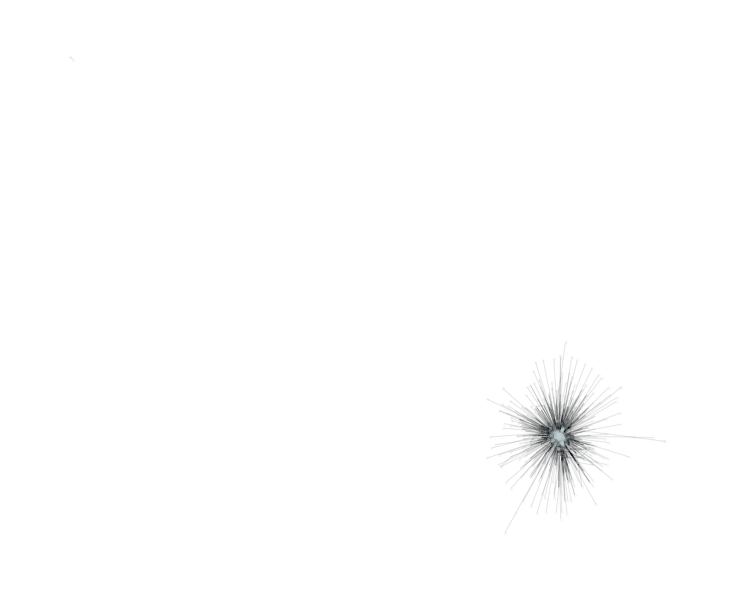

In [12]:
#Importa e mostra a rede de conexões entre aeroportos americanos
G_air = nx.read_weighted_edgelist(str(personal_path + "usairport.txt"))
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G_air)
nx.draw(G_air, with_labels = False, node_size=5, node_color = "lightblue", 
          edgecolors = "lightgray", alpha=0.1, font_size=16, pos = pos)

Existem dois vértices no cato superior esquerdo da imagem acima, deslocados da rede original, que fazem com que o restante da rede pareça pequena.

**Definições**

A transitividade de uma rede é definida como a fração de todos os triângulos, isto é, caminhos por três vértices, contidos na rede e das tríades, que são formadas por duas arestas com um vértice em comum

$$T = 3 \frac{N_{triângulos}}{N_{tríades}}$$

Já o clustering médio é dado por

$$C = \frac{1}{n} \sum_{i \in G} c_i$$

onde $c_i$ é o número de triângulos que passa por um dado vértice i:

$$c_i = \frac{2 N_{triângulos}(i)}{k_i(k_i -1)}$$

Tanto a transitividade quanto o clustering médio de uma rede $G$ já estão implementados na base NetworkX **[1-3]**.

In [30]:
#Transitividade
t_air = (nx.transitivity(G_air)) 
print("Transitividade para a rede de aeroportos = ","%3.2f"%t_air)

Transitividade para a rede de aeroportos =  0.38


In [32]:
#Clustering médio
c_air = nx.average_clustering(G_air)
print("Average clustering:", "%3.2f"%c_air)

Average clustering: 0.50


##Q5.

Aqui, calculamos a complexidade como definido na Q2., mas para a rede dos aeroportos.

In [39]:
alpha_air = complexidade(G_air)
print("Complexidade para a rede de aeroportos dos EUA = ", "%3.2f"%alpha_air)   #mostra o valor arredondado para 2 casas decimais

Complexidade para a rede de aeroportos dos EUA =  112.22


O cálculo de entropia de Shannon segue o que foi definido na Q3.

In [35]:
H_air = entropia_shannon(G_air)
print("Entropia de Shannon para a rede de aeroportos = ", "%3.3f"%H_air)   #mostra o valor arredondado para 2 casas decimais

Entropia de Shannon para a rede de aeroportos =  4.986


# Referências

[1] Clustering, disponível em https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#clustering

[2] Average clustering, disponível em https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#average-clustering

[3] Transitividade, disponível em https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html#transitivity